Lab 2 

In [1]:
import numpy as np
import pandas as pd

In [3]:
#Load data into memory
data = pd.read_csv('data.csv') 

print(data.head()) #le prime 5 righe

   label  pixel0  pixel1  pixel2  pixel3  pixel4  pixel5  pixel6  pixel7  \
0      1       0       0       0       0       0       0       0       0   
1      0       0       0       0       0       0       0       0       0   
2      1       0       0       0       0       0       0       0       0   
3      4       0       0       0       0       0       0       0       0   
4      0       0       0       0       0       0       0       0       0   

   pixel8  ...  pixel774  pixel775  pixel776  pixel777  pixel778  pixel779  \
0       0  ...         0         0         0         0         0         0   
1       0  ...         0         0         0         0         0         0   
2       0  ...         0         0         0         0         0         0   
3       0  ...         0         0         0         0         0         0   
4       0  ...         0         0         0         0         0         0   

   pixel780  pixel781  pixel782  pixel783  
0         0         0         

In [15]:
#Convert data into a matrix
data = np.array(data) #we will lose the name of the olumns and the row number

print(data.shape)

#Dataset has 42.000 observation of 28 x 28 dimesion

#Flattening: convertire una matrice in un vettore colonna 
#flattening 28 x 28 -> 784 = 28*28 dimensional vector

#Split data into a matrix X and a vector Y where:
#
# X is dimension (42000, 784)
# Y is dimesion (42000,)
# Y is the first column of data, while X is the rest

X = data[:, 1:]  #all the rows from column 1
X = X.T #per fare corrispondere le dimesnioni: ogni colonna un'immagine
d, N = X.shape
print(X.shape)

Y = data[:,0]  #all the rows and just the first column(0)
print(Y.shape)


(42000, 785)
(784, 42000)
(42000,)


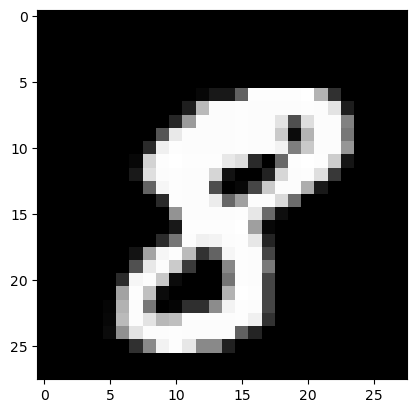

8


In [19]:
#How to visualize image in Python?
import matplotlib.pyplot as plt

#Load an image in memory
idx = 10 #la decima immagine
img = X[:,idx] #take all the rows and just the column idx
img = np.reshape(img, (28, 28))  #opposite of flattening: da vettore a matrice

#Visualize
plt.imshow(img, cmap='gray') #cmap: how to convert pixel in colors
plt.show()

print(Y[idx]) #the correspondence

In [23]:
#Create a function that takes as input two array X  and Y and an integer Ntrain 
#and returns four arrays Xtrain, Xtest, Ytrain and Ytest where:

#Xtrain is composed by N_train random samples from X
#Xtest is the rest of the array X
#Ytrain and Ytest accordingly

#limitations: the sample has to be random --> numpy.random.shuffle (and take the first ..) (shuffle only the columns) [If ypu apply the suffle directly on X, it will shuffle the rows]

#Example: if Ntrain=30000 on our MNIST data, the shapes should be:
#                                            Xtrain(784, 30000) Xtest(784, 12000)
#                                            Ytrain(30000,)     Ytest(12000,)


#Hint: 1-Generate a vector idx = [0, ..., N-1]
#      2-Shuffle the vector idx
#      3-Extract from X and Y the elements corresponding to idx[:Ntrain]

#IMPORTANT!!!!!!!!!!!!!

def split_data(X, Y, Ntrain):

    d, N = X.shape

    idx = np.arange(N)
    np.random.shuffle(idx)

    train_idx = idx[:Ntrain]
    test_idx = idx[Ntrain:]

    Xtrain = X[:, train_idx]
    Ytrain = Y[train_idx]
    
    Xtest = X[:, test_idx]
    Ytest = Y[test_idx]

    return (Xtrain, Ytrain), (Xtest, Ytest)


#Test it
(Xtrain, Ytrain), (Xtest, Ytest) = split_data(X, Y, 30000)

print(Xtrain.shape, Xtest.shape)


(784, 30000) (784, 12000)


In [ ]:
#SVA of a matrix A
U, s, VT = np.linalg.svd(A)

In [ ]:
#If X is a matrix
np.mean(X, axis=0) #axis=0(1) apply by column(row)


In [3]:
#Subtraction between matrix and (column) vector --> automaticamente la sottrazione avviene column by column 
import numpy as np

x = np.linspace(0, 1, 10)
print(x.shape)

x = np.reshape(x, (10, 1))
print(x.shape)

(10,)
(10, 1)


In [26]:
# Implementation of PCA   ---- COMPLETARE (FA PARTE DI HOMEWORK)

#Write a function that takes as input a matrix X and an integer k
#and returns Z=Uk^TX, the PCA of X

def PCA(X, k):
    X_c = X - np.mean(X, axis=1)    #np.mean -> centroide

    U, s, VT = np.linalg.svd(X_c)

    U_k = U[:, :k]
    #S_k = s[:k, :k]
    #V_kT = VT[:k, :]

    #X_ck = U_k @ S_k @ V_kT

    Z_k = U_k.T @ X_c       #comne dimensione dovrebbe venire tipo 2x30000

    return Z_k 